In [1]:
import pandas as pd
import numpy as np
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import librosa 
import librosa.display  #audio visualisation

In [6]:
audio,sr = librosa.load("C:\\Users\\adhik\\Downloads\\audio\\fold4\\22883-7-72-0.wav")#graphical format
sound = ipd.Audio("C:\\Users\\adhik\\Downloads\\audio\\fold4\\22883-7-72-0.wav")

In [7]:
sound

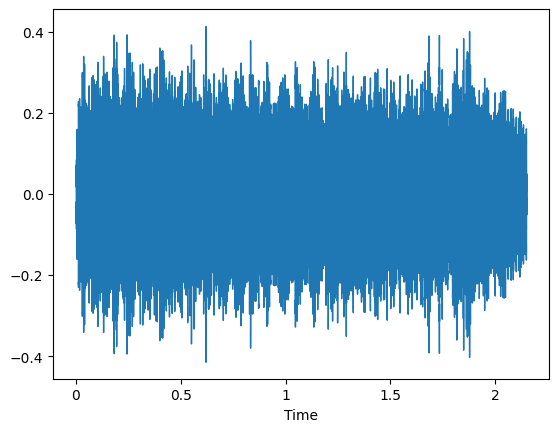

In [10]:
librosa.display.waveshow(audio)

In [12]:
labels = pd.read_csv("C:\\Users\\adhik\\Downloads\\audio\\UrbanSound8K.csv")
labels
#wehave to ccreate a model that can predict what is the source of the sound based on the audio

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [14]:
##Extracting Audio Features
##1.Zero Crossing Rate:this is the rate at which a signal crosses the negetive value  to zero and then to positive value
FRAME_SIZE = 1024
HOP_LENGTH = 512
ZCR_music = librosa.feature.zero_crossing_rate(audio,frame_length=FRAME_SIZE,hop_length = HOP_LENGTH)[0]

In [16]:
ZCR_music.shape

(93,)

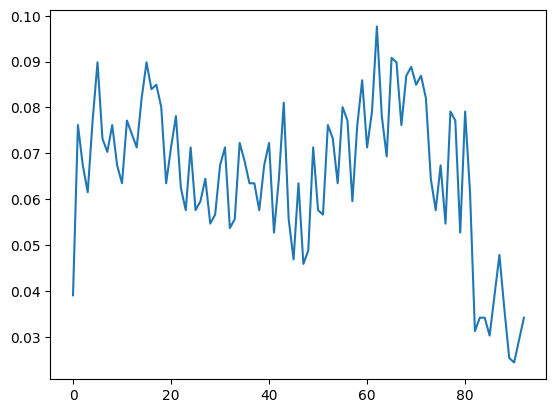

In [18]:
plt.plot(ZCR_music)

In [21]:
##another feature to extract will be Mel Frequency Coefficients : in sound processing the mel frequency cepstrum is a representation of short term of a sound
#basesd on linear cosine transform of a log power spectrum on a non linear mel scale of frequency mel frequency cepstral coefficient are coefficient that 
#collectively make up an MFC
#log transform of a value

In [22]:
mfccs_music = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=10)
mfccs_music.shape

(10, 93)

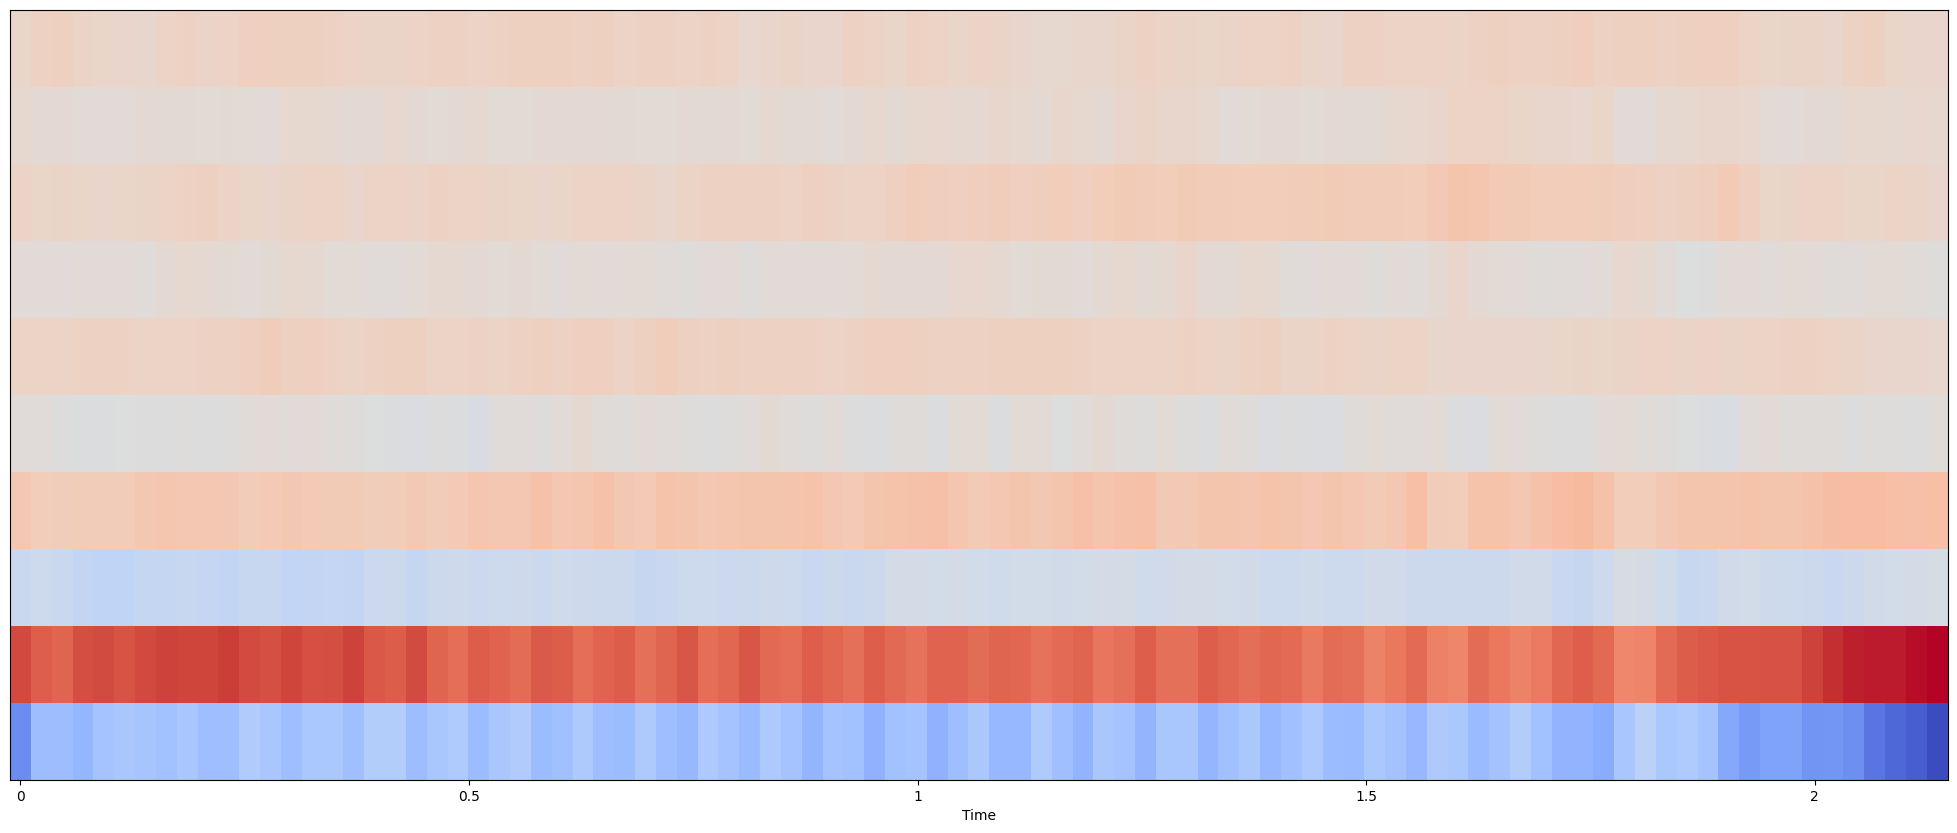

In [24]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs_music,x_axis="time",sr=sr)

In [25]:
##making funcioton to extract these features

In [39]:
def mfcc_extractor(file_name):
    audio,sr = librosa.load(file_name)
    mfcc = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=10)
    mfcc_scaled = np.mean(mfcc.T,axis = 0)
    return mfcc_scaled

In [40]:
def zcr_extractor(file_name):
    audio,sr = librosa.load(file_name)
    zcr = librosa.feature.zero_crossing_rate(audio, frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
    zcr_scaled = np.mean(zcr.T,axis=0)
    return zcr_scaled

In [41]:
##extracting from all the audios files
##"C:\\Users\\adhik\\Downloads\\audio\\fold8\\96159-4-0-0.wav"

In [42]:
import os
import tqdm

ind_features = []
audio_dataset_path = "C:\\Users\\adhik\\Downloads\\audio"

for index_num, row in labels.iterrows():
    # Construct the file path using os.path.join for portability
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), row["slice_file_name"])
    label = row['class']
    
    # Assuming zcr_extractor is a function you've defined elsewhere
    mfcc = mfcc_extractor(file_name)
    
    # Append individual features to ind_features
    ind_features.append([mfcc, label])

# Optional: If you want to use tqdm to visualize progress
for feature in tqdm.tqdm(ind_features, desc='Extracting Features'):
    # Process each feature or save it to a file, etc.
    pass  # Replace pass with your actual processing code


C:\Users\adhik\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\adhik\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\adhik\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
Extracting Features: 100%|████████████████████████████████████████████████████| 8732/8732 [00:00<00:00, 2137044.14it/s]


In [43]:
import os
import tqdm

ind_features = []
audio_dataset_path = "C:\\Users\\adhik\\Downloads\\audio"

for index_num, row in labels.iterrows():
    # Construct the file path using os.path.join for portability
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), row["slice_file_name"])
    label = row['class']
    
    # Assuming zcr_extractor is a function you've defined elsewhere
    zcr = zcr_extractor(file_name)
    
    # Append individual features to ind_features
    ind_features.append([zcr, label])

# Optional: If you want to use tqdm to visualize progress
for feature in tqdm.tqdm(ind_features, desc='Extracting Features'):
    # Process each feature or save it to a file, etc.
    pass  # Replace pass with your actual processing code


Extracting Features: 100%|████████████████████████████████████████████████████| 8732/8732 [00:00<00:00, 2185503.19it/s]


In [47]:
##now i will be converting this into a dataframe
ind_features

[[0.12779017857142858, 'dog_bark'],
 [0.1391742684248555, 'children_playing'],
 [0.10210440751445087, 'children_playing'],
 [0.13109081466763006, 'children_playing'],
 [0.11824873554913294, 'children_playing'],
 [0.07347362716763006, 'children_playing'],
 [0.07378973988439307, 'children_playing'],
 [0.07236723265895954, 'children_playing'],
 [0.06688041907514451, 'children_playing'],
 [0.12189592633928571, 'car_horn'],
 [0.13845957880434784, 'car_horn'],
 [0.20958116319444445, 'car_horn'],
 [0.16044921875, 'car_horn'],
 [0.2017505787037037, 'car_horn'],
 [0.15014789559248554, 'dog_bark'],
 [0.1542799403901734, 'dog_bark'],
 [0.1541501083815029, 'dog_bark'],
 [0.14931245484104047, 'dog_bark'],
 [0.14575054190751446, 'dog_bark'],
 [0.12848288475433525, 'dog_bark'],
 [0.13031746748554912, 'dog_bark'],
 [0.13126016076589594, 'dog_bark'],
 [0.1877822434971098, 'air_conditioner'],
 [0.1824817106213873, 'air_conditioner'],
 [0.1848977149566474, 'air_conditioner'],
 [0.1853831737716763, 'air_c

In [45]:
features_df = pd.DataFrame(ind_features,columns=['MFCCs','Labels'])
features_df.head()

,MFCCs,Labels
0,0.127790,dog_bark
1,0.139174,children_playing
2,0.102104,children_playing
3,0.131091,children_playing
4,0.118249,children_playing


In [49]:
X = np.array(features_df['MFCCs'].tolist()) #indenpendent features
Y = np.array(features_df['Labels'].tolist())#dependenrt features

In [96]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [108]:
##performing label encoding on dependent features
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(Y)
y = to_categorical(encoded_labels)
y.shape

(8732, 10)

(8732, 10)


In [100]:
##splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

In [103]:
model = Sequential()
num_labels = y.shape[1]
##first layer
model.add(Dense(100,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
##final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

C:\Users\adhik\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.fit(X_train,Y_train,batch_size=10,epochs=100,verbose=1)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None,), dtype=float32). Expected shape (None, 10), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=float32)
  • training=True
  • mask=None